#### In this notebook we are going to implement the unSupersive technique segmentation on the customer online purchase data.
#### Approach:RFM segementation(Recency,Freuency and Monetary) based on these parameters we will perform the segementaion using the pandas libraries and will also perrform the EDA using the tables,seaborn plots etc.

In [ ]:
### Decription of the Approach and nomenclature

#### firstly we will perform the data cleaning,after that we will divide the monetary(value) into 10 segements,that column has the significance in the 
####basic eda to describe the revenue of each customer segment.
#### We will check the 0.33 and 0.67 quantile values for 'Recency','Frequency' and the 'Monetary' so that we can know the percentile fo the value in each percentile group.
#### on the basis of each percentile values we will assign the ordinal values to each segment type
####for the frequency and monetary segments the value would be 1<2<3
#### for the recency the labels wuld be given as 'At_risk','Churn' and 'Active'.



In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [63]:
customer=pd.read_csv('D:/Python/Dataset/Customers.csv',encoding='ANSI')

In [64]:
customer.head(5)

,Customer_ID,Gender,First_Date,First_region,First_state,First_city,Recent_Date,Last_region,Last_state,Last_city,Customer_Value,Buy_Times,Points_Earned,Points_Redeemed
0,129609144,M,20130130,West,Gujarat,Surat,20130216,West,Gujarat,Surat,2032.0,2,200.0,0.0
1,129627580,M,20130129,North,Delhi,Delhi,20130129,North,Delhi,Delhi,1709.0,1,100.0,0.0
2,130363481,M,20130221,West,Gujarat,Surat,20130221,West,Gujarat,Surat,523.0,1,10.0,0.0
3,49817480,M,20130222,West,Maharashtra,Pimpri-Chinchwad,20130222,West,Maharashtra,Pimpri-Chinchwad,5132.0,1,170.0,0.0
4,126343829,F,20130301,North,Delhi,Delhi,20130301,North,Delhi,Delhi,1008.0,1,60.0,0.0


In [65]:
customer.columns=customer.columns.str.lower()

In [66]:
customer['first_date']=pd.to_datetime(customer['first_date'].astype('object'),format="%Y%m%d")
customer['recent_date']=pd.to_datetime(customer['recent_date'].astype('object'),format="%Y%m%d")

In [67]:
customer['recency']=(customer['recent_date']-customer['first_date']).dt.days

In [68]:
customer.head()

,customer_id,gender,first_date,first_region,first_state,first_city,recent_date,last_region,last_state,last_city,customer_value,buy_times,points_earned,points_redeemed,recency
0,129609144,M,2013-01-30,West,Gujarat,Surat,2013-02-16,West,Gujarat,Surat,2032.0,2,200.0,0.0,17
1,129627580,M,2013-01-29,North,Delhi,Delhi,2013-01-29,North,Delhi,Delhi,1709.0,1,100.0,0.0,0
2,130363481,M,2013-02-21,West,Gujarat,Surat,2013-02-21,West,Gujarat,Surat,523.0,1,10.0,0.0,0
3,49817480,M,2013-02-22,West,Maharashtra,Pimpri-Chinchwad,2013-02-22,West,Maharashtra,Pimpri-Chinchwad,5132.0,1,170.0,0.0,0
4,126343829,F,2013-03-01,North,Delhi,Delhi,2013-03-01,North,Delhi,Delhi,1008.0,1,60.0,0.0,0


In [69]:
customer.isna().sum()

customer_id         0
gender             14
first_date          0
first_region       21
first_state        17
first_city          0
recent_date         0
last_region         0
last_state          0
last_city           0
customer_value     36
buy_times           0
points_earned      21
points_redeemed    12
recency             0
dtype: int64

In [70]:
#### Missing  vlue imputation

customer['gender']=customer['gender'].fillna(customer['gender'].mode()[0])
customer['first_region']=customer['first_region'].fillna(customer['first_region'].mode()[0])
customer['first_state']=customer['first_state'].fillna(customer['first_state'].mode()[0])


In [71]:
### We will check the numeric values firsts and ten we do the imputation
cont_cols=customer.select_dtypes(include=np.number)
cont_cols=cont_cols[cont_cols.columns.difference(['customer_id'])]

In [72]:
### describe

def cont_describe(x):
    mean=round(x.mean(),3)
    mode=x.mode()[0]
    median=round(x.median(),3)
    count_na=x.isna().sum()
    p1=round(x.quantile(0.01),3)
    p10=round(x.quantile(0.1),3)
    p25=round(x.quantile(0.25),3)
    p50=round(x.quantile(0.5),3)
    p75=round(x.quantile(0.75),3)
    p90=round(x.quantile(0.9),3)
    p99=round(x.quantile(0.99),3)
    min=round(x.min(),3)
    max=round(x.max(),3)
    
    return pd.Series(index=['mean','median','mode','count_na','p1','p10','p25','p50','p75','p90','p99','min','max'],
                    data=[mean,median,mode,count_na,p1,p10,p25,p50,p75,p90,p99,min,max])

In [73]:
cont_cols.apply(cont_describe).T

,mean,median,mode,count_na,p1,p10,p25,p50,p75,p90,p99,min,max
buy_times,5.478,2.000,1.0,0.0,1.00,1.0,1.0,2.0,6.0,13.0,39.000,1.0,586.000
customer_value,12544.894,3960.001,1000.0,36.0,330.26,981.3,1484.5,3960.0,11136.0,27990.0,106907.671,0.0,5098714.699
points_earned,529.356,195.000,0.0,21.0,0.00,15.0,65.0,195.0,535.0,1249.2,4701.860,0.0,142030.000
points_redeemed,582.211,0.000,0.0,12.0,0.00,0.0,0.0,0.0,0.0,251.8,9090.270,0.0,1387520.000
recency,123.455,48.000,0.0,0.0,0.00,0.0,0.0,48.0,236.0,378.0,444.000,0.0,455.000


In [74]:
### from the data we can conclude that we will impute the median in the missing values

In [75]:
customer['customer_value']=customer['customer_value'].fillna(customer['customer_value'].median())
customer['points_earned']=customer['points_earned'].fillna(customer['points_earned'].median())
customer['points_redeemed']=customer['points_redeemed'].fillna(customer['points_redeemed'].median())


In [76]:
customer.isna().sum()

customer_id        0
gender             0
first_date         0
first_region       0
first_state        0
first_city         0
recent_date        0
last_region        0
last_state         0
last_city          0
customer_value     0
buy_times          0
points_earned      0
points_redeemed    0
recency            0
dtype: int64

In [77]:
### Now we will rename the columns based on the RFM process

customer.rename(columns={'customer_value':'monetary','buy_times':'frequency'},inplace=True)

In [78]:
customer.head()

,customer_id,gender,first_date,first_region,first_state,first_city,recent_date,last_region,last_state,last_city,monetary,frequency,points_earned,points_redeemed,recency
0,129609144,M,2013-01-30,West,Gujarat,Surat,2013-02-16,West,Gujarat,Surat,2032.0,2,200.0,0.0,17
1,129627580,M,2013-01-29,North,Delhi,Delhi,2013-01-29,North,Delhi,Delhi,1709.0,1,100.0,0.0,0
2,130363481,M,2013-02-21,West,Gujarat,Surat,2013-02-21,West,Gujarat,Surat,523.0,1,10.0,0.0,0
3,49817480,M,2013-02-22,West,Maharashtra,Pimpri-Chinchwad,2013-02-22,West,Maharashtra,Pimpri-Chinchwad,5132.0,1,170.0,0.0,0
4,126343829,F,2013-03-01,North,Delhi,Delhi,2013-03-01,North,Delhi,Delhi,1008.0,1,60.0,0.0,0


### creation of the 10 groups(segment type)

In [79]:
customer['monetary'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

0.1      985.230900
0.2     1185.800000
0.3     1901.040000
0.4     2761.201200
0.5     3960.000500
0.6     5708.640000
0.7     8682.930000
0.8    14396.939600
0.9    27851.504842
Name: monetary, dtype: float64

In [80]:
customer['seg']=pd.qcut(customer.monetary,q=10,labels=False)

In [81]:
customer.head(5)

,customer_id,gender,first_date,first_region,first_state,first_city,recent_date,last_region,last_state,last_city,monetary,frequency,points_earned,points_redeemed,recency,seg
0,129609144,M,2013-01-30,West,Gujarat,Surat,2013-02-16,West,Gujarat,Surat,2032.0,2,200.0,0.0,17,3
1,129627580,M,2013-01-29,North,Delhi,Delhi,2013-01-29,North,Delhi,Delhi,1709.0,1,100.0,0.0,0,2
2,130363481,M,2013-02-21,West,Gujarat,Surat,2013-02-21,West,Gujarat,Surat,523.0,1,10.0,0.0,0,0
3,49817480,M,2013-02-22,West,Maharashtra,Pimpri-Chinchwad,2013-02-22,West,Maharashtra,Pimpri-Chinchwad,5132.0,1,170.0,0.0,0,5
4,126343829,F,2013-03-01,North,Delhi,Delhi,2013-03-01,North,Delhi,Delhi,1008.0,1,60.0,0.0,0,1


In [ ]:
#### Check the quantile value of 0.33 and 0.67 because we need the 3 segements for each column,this analysis would help to divide 
#### into the three groups 

In [82]:

quantiles =customer[['frequency','monetary','recency' ]].quantile(q=[0.33,0.67])
quantiles

,frequency,monetary,recency
0.33,1.0,2115.134,0.0
0.67,4.0,7623.186,163.0


In [84]:
### some eda on the basis of m_Seg

customer.groupby(by='seg')['monetary'].sum()/customer.groupby(by='seg')['monetary'].sum().sum()

seg
0    0.005463
1    0.008514
2    0.012057
3    0.018411
4    0.027221
5    0.037281
6    0.056645
7    0.090012
8    0.158546
9    0.585851
Name: monetary, dtype: float64

In [ ]:
#### based on the Quantile analysis we can define the each segment type

In [85]:
###RFM Segmentation

customer['m_seg']=np.where(customer.monetary<2115.134,1,np.where(customer.monetary<7623.186,2,3))  ### 3>2>1
customer['r_seg']=np.where(customer.recency<5,'Active',np.where(customer.recency<163,'At_risk','Churn'))
customer['f_seg']=np.where(customer.frequency<=1,1,np.where(customer.frequency<=4,2,3))      3>2>1

In [86]:
customer.head(5)

,customer_id,gender,first_date,first_region,first_state,first_city,recent_date,last_region,last_state,last_city,monetary,frequency,points_earned,points_redeemed,recency,seg,m_seg,r_seg,f_seg
0,129609144,M,2013-01-30,West,Gujarat,Surat,2013-02-16,West,Gujarat,Surat,2032.0,2,200.0,0.0,17,3,1,At_risk,2
1,129627580,M,2013-01-29,North,Delhi,Delhi,2013-01-29,North,Delhi,Delhi,1709.0,1,100.0,0.0,0,2,1,Active,1
2,130363481,M,2013-02-21,West,Gujarat,Surat,2013-02-21,West,Gujarat,Surat,523.0,1,10.0,0.0,0,0,1,Active,1
3,49817480,M,2013-02-22,West,Maharashtra,Pimpri-Chinchwad,2013-02-22,West,Maharashtra,Pimpri-Chinchwad,5132.0,1,170.0,0.0,0,5,2,Active,1
4,126343829,F,2013-03-01,North,Delhi,Delhi,2013-03-01,North,Delhi,Delhi,1008.0,1,60.0,0.0,0,1,1,Active,1


In [97]:
### labeling the customer type
customer['fm_seg']=np.where(((customer.f_seg==3) & (customer.m_seg==3)),'Platinum',
                             np.where((((customer.f_seg==3) & (customer.m_seg==2)) | ((customer.f_seg==2) &(customer.m_seg==3))),
                                       'Gold',np.where((((customer.f_seg==1) &(customer.m_seg==3)) |((customer.f_seg==3) &(customer.m_seg==1))),
                                                       'Silver','Standard')))

In [99]:
customer[customer.fm_seg=='Platinum']

,customer_id,gender,first_date,first_region,first_state,first_city,recent_date,last_region,last_state,last_city,monetary,frequency,points_earned,points_redeemed,recency,seg,m_seg,r_seg,f_seg,fm_seg
12,74053888,F,2012-01-02,West,Gujarat,Surat,2013-03-14,West,Gujarat,Surat,9142.497,10,639.0,2.0,437,7,3,Churn,3,Platinum
13,7256956,M,2012-01-02,North,Rajasthan,Jaipur,2012-11-26,North,Rajasthan,Jaipur,8019.600,5,609.0,0.0,329,6,3,Churn,3,Platinum
14,1610085,F,2012-01-03,North,Delhi,Delhi,2012-10-13,North,Delhi,Delhi,10380.199,6,1189.0,0.0,284,7,3,Churn,3,Platinum
15,7518872,M,2012-01-04,North,Uttar Pradesh,Kanpur,2013-01-23,North,Uttar Pradesh,Kanpur,14587.000,6,865.0,0.0,385,8,3,Churn,3,Platinum
18,63508964,M,2012-01-06,West,Maharashtra,Pimpri-Chinchwad,2013-02-22,West,Maharashtra,Pimpri-Chinchwad,145472.702,36,680.0,16635.0,413,9,3,Churn,3,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,14762484,M,2012-01-31,North,Madhya Pradesh,Indore,2012-12-11,North,Madhya Pradesh,Bhopal,88407.500,23,4317.0,0.0,315,9,3,Churn,3,Platinum
9994,73876936,M,2012-02-05,West,Gujarat,Surat,2013-02-18,West,Gujarat,Surat,8059.599,5,647.0,0.0,379,6,3,Churn,3,Platinum
9995,50093138,M,2012-02-08,North,Uttar Pradesh,Agra,2012-11-14,North,Uttar Pradesh,Agra,13818.600,7,1195.0,1800.0,280,7,3,Churn,3,Platinum
9996,92763145,M,2012-02-09,South,Telangana,Hyderabad,2013-03-19,South,Telangana,Hyderabad,13016.500,7,870.0,0.0,404,7,3,Churn,3,Platinum


In [100]:
customer['rfm_seg']=customer.r_seg+'_'+customer.fm_seg

In [101]:
customer.head(5)

,customer_id,gender,first_date,first_region,first_state,first_city,recent_date,last_region,last_state,last_city,...,frequency,points_earned,points_redeemed,recency,seg,m_seg,r_seg,f_seg,fm_seg,rfm_seg
0,129609144,M,2013-01-30,West,Gujarat,Surat,2013-02-16,West,Gujarat,Surat,...,2,200.0,0.0,17,3,1,At_risk,2,Standard,At_risk_Standard
1,129627580,M,2013-01-29,North,Delhi,Delhi,2013-01-29,North,Delhi,Delhi,...,1,100.0,0.0,0,2,1,Active,1,Standard,Active_Standard
2,130363481,M,2013-02-21,West,Gujarat,Surat,2013-02-21,West,Gujarat,Surat,...,1,10.0,0.0,0,0,1,Active,1,Standard,Active_Standard
3,49817480,M,2013-02-22,West,Maharashtra,Pimpri-Chinchwad,2013-02-22,West,Maharashtra,Pimpri-Chinchwad,...,1,170.0,0.0,0,5,2,Active,1,Standard,Active_Standard
4,126343829,F,2013-03-01,North,Delhi,Delhi,2013-03-01,North,Delhi,Delhi,...,1,60.0,0.0,0,1,1,Active,1,Standard,Active_Standard


In [106]:
cust_seg=pd.DataFrame(customer.rfm_seg.value_counts())

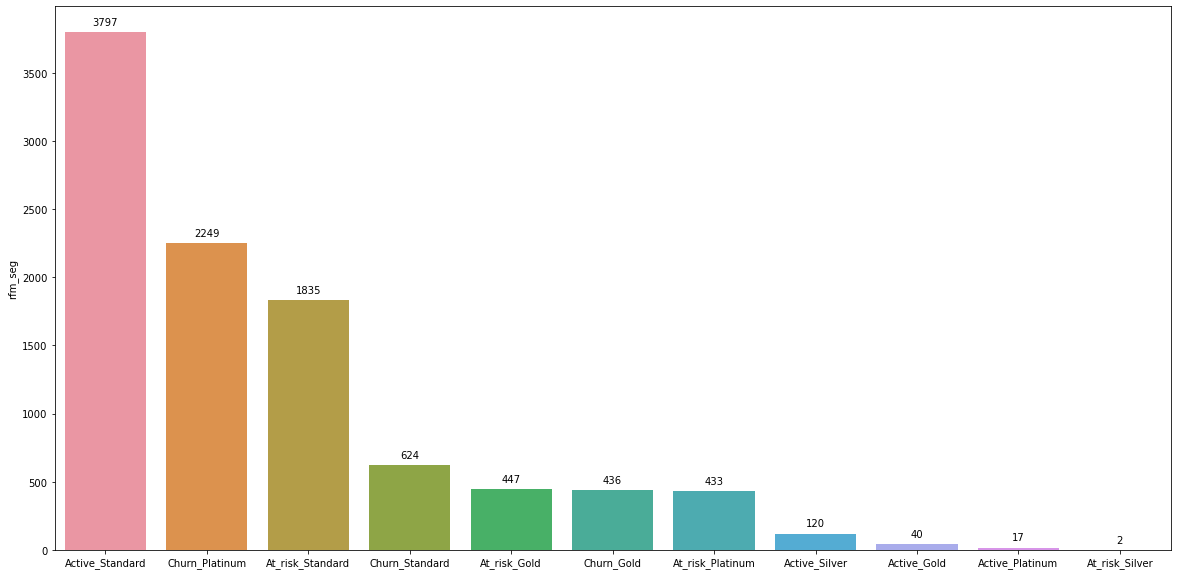

In [113]:
plt.figure(figsize=(20,10))
splot=sns.barplot(y='rfm_seg',x=cust_seg.index,data=cust_seg)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()

In [ ]:
#### from the graph we can analyse that the Platinum customers with churn and gold customer at churn are the highest,we needd to target these customers

In [114]:
cust_seg

,rfm_seg
Active_Standard,3797
Churn_Platinum,2249
At_risk_Standard,1835
Churn_Standard,624
At_risk_Gold,447
Churn_Gold,436
At_risk_Platinum,433
Active_Silver,120
Active_Gold,40
Active_Platinum,17


In [116]:
churn_plt=customer[(customer.rfm_seg=='Churn_Platinum')]

In [124]:
pd.DataFrame(churn_plt.groupby(by='last_city')['customer_id'].count().reset_index()).sort_values(by='customer_id',ascending=False).head(10)

,last_city,customer_id
57,Surat,509
16,Delhi,213
31,Kanpur,198
2,Ahmedabad,151
33,Kolkata,142
5,Bangalore,137
14,Chennai,106
41,Mumbai,94
49,Pimpri-Chinchwad,93
62,Vadodara,79


In [ ]:
##Churn customers 'Gold'

In [125]:
churn_gld=customer[(customer.rfm_seg=='Churn_Gold')]

In [126]:
pd.DataFrame(churn_gld.groupby(by='last_city')['customer_id'].count().reset_index()).sort_values(by='customer_id',ascending=False).head(10)

,last_city,customer_id
38,Surat,92
11,Delhi,49
4,Bangalore,32
8,Chennai,31
20,Kanpur,29
22,Kolkata,28
1,Ahmedabad,23
40,Vadodara,21
27,Mumbai,19
32,Pimpri-Chinchwad,13


In [127]:
#### Atrisk platinum
atr_plt=customer[(customer.rfm_seg=='At_risk_Platinum')]

In [128]:
pd.DataFrame(atr_plt.groupby(by='last_city')['customer_id'].count().reset_index()).sort_values(by='customer_id',ascending=False).head(10)

,last_city,customer_id
32,Surat,95
9,Delhi,44
2,Ahmedabad,36
24,Mumbai,25
18,Kanpur,25
3,Bangalore,23
19,Kolkata,22
8,Chennai,19
13,Hyderabad,18
28,Pimpri-Chinchwad,17


In [130]:
#### At risk gold

atr_gld=customer[(customer.rfm_seg=='At_risk_Gold')]
pd.DataFrame(atr_gld.groupby(by='last_city')['customer_id'].count().reset_index()).sort_values(by='customer_id',ascending=False).head(10)

,last_city,customer_id
28,Surat,90
6,Delhi,46
2,Bangalore,38
5,Chennai,31
11,Hyderabad,26
14,Kanpur,26
24,Pimpri-Chinchwad,25
16,Kolkata,23
20,Mumbai,21
0,Ahmedabad,20
